In [2]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from google.colab import files
import geopandas as gpd
from shapely.geometry import Point
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import pandas as pd
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [ ]:
files.upload()

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023

Dataset URL: https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023
License(s): CC0-1.0
 89% 103M/116M [00:01<00:00, 96.9MB/s] 
100% 116M/116M [00:01<00:00, 81.6MB/s]


In [32]:
!unzip 110m_cultural.zip

Archive:  110m_cultural.zip
  inflating: ne_110m_populated_places_simple.prj  
  inflating: ne_110m_admin_0_countries.shx  
  inflating: ne_110m_admin_0_countries_lakes.shx  
  inflating: ne_110m_admin_0_pacific_groupings.prj  
  inflating: ne_110m_admin_0_countries.shp  
 extracting: ne_110m_admin_0_countries.cpg  
 extracting: ne_110m_admin_0_countries_lakes.cpg  
  inflating: ne_110m_admin_1_states_provinces_lines.README.html  
  inflating: ne_110m_admin_0_countries_lakes.shp  
  inflating: ne_110m_admin_0_map_units.prj  
  inflating: ne_110m_admin_1_states_provinces.prj  
  inflating: ne_110m_populated_places.shx  
  inflating: ne_110m_admin_0_boundary_lines_land.dbf  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
  inflating: ne_110m_admin_0_scale_rank.dbf  
 extracting: ne_110m_populated_places.cpg  
  inflating: ne_110m_populated_places_simple.README.html  
  inflating: ne_110m_populated_places.shp  
  inflating: ne_110m_admin_1_states_provinces_lakes.dbf  
  inflating: n

In [8]:
!unzip the-ultimate-earthquake-dataset-from-1990-2023.zip

Archive:  the-ultimate-earthquake-dataset-from-1990-2023.zip
  inflating: Eartquakes-1990-2023.csv  


In [9]:
df = pd.read_csv("Eartquakes-1990-2023.csv")

#1. Analyse exploratoire de données

In [10]:
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [11]:
# Display the last 5 rows of data
df.tail()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00
3445750,1690628937884,"35 km W of Karluk, Alaska",automatic,0,12,earthquake,0.90,Alaska,-155.051000,57.564800,250.000,2023-07-29 11:08:57.884000+00:00


In [12]:
# Display the shape of the data (number of rows and columns)
df.shape

(3445751, 12)

In [13]:
# Display the column names
df.columns

Index(['time', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

In [14]:
# Display the data types of each column
df.dtypes

,0
time,int64
place,object
status,object
tsunami,int64
significance,int64
data_type,object
magnitudo,float64
state,object
longitude,float64
latitude,float64


La colonne « time » est de type object, ce qui signifie qu'elle contient des chaînes de caractères. Il est recommandé de la convertir au format datetime. Cette conversion facilitera les analyses basées sur le temps, comme les regroupements par année ou par mois.

Les types de données des autres colonnes sont appropriés et n'ont pas besoin d'être modifiés.

In [15]:
df['time'] = pd.to_datetime(df['time'])

In [16]:
df.dtypes

,0
time,datetime64[ns]
place,object
status,object
tsunami,int64
significance,int64
data_type,object
magnitudo,float64
state,object
longitude,float64
latitude,float64


Maintenant que nous pouvons voir les colonnes de temps, le type de données est modifié comme prévu au format datetime.

- Vérifier les données manquantes :

In [17]:
# Check for missing values in each column
df.isnull()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3445746,False,False,False,False,False,False,False,False,False,False,False,False
3445747,False,False,False,False,False,False,False,False,False,False,False,False
3445748,False,False,False,False,False,False,False,False,False,False,False,False
3445749,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# Count the number of missing values in each column
df.isnull().sum()

,0
time,0
place,0
status,0
tsunami,0
significance,0
data_type,0
magnitudo,0
state,0
longitude,0
latitude,0


Aucun problème de données manquantes détecté après vérification .

Vérifiez si les valeurs de chaque colonne sont dans une plage logique et cohérente avec leur contexte.

In [19]:
# Check the range of values in the latitude column
print(df['magnitudo'].describe())

count    3.445751e+06
mean     1.774076e+00
std      1.291055e+00
min     -9.990000e+00
25%      9.100000e-01
50%      1.460000e+00
75%      2.300000e+00
max      9.100000e+00
Name: magnitudo, dtype: float64


- magnitudo values should be between -10 and 10

In [20]:
# Check the range of values in the latitude column
print(df['depth'].describe())

count    3.445751e+06
mean     2.285387e+01
std      5.484938e+01
min     -1.000000e+01
25%      3.120000e+00
50%      7.700000e+00
75%      1.612000e+01
max      7.358000e+02
Name: depth, dtype: float64


- depth values should be between -10 and 736

In [21]:
# Check the range of values in the latitude column
print(df['significance'].describe())

count    3.445751e+06
mean     7.400973e+01
std      1.016364e+02
min      0.000000e+00
25%      1.300000e+01
50%      3.300000e+01
75%      8.100000e+01
max      2.910000e+03
Name: significance, dtype: float64


- significance values should be between 0 and 2910

In [22]:
# Check the range of values in the latitude column
print(df['latitude'].describe())

count    3.445751e+06
mean     3.746483e+01
std      2.041577e+01
min     -8.442200e+01
25%      3.406400e+01
50%      3.793567e+01
75%      4.784800e+01
max      8.738600e+01
Name: latitude, dtype: float64


- latitude values should be between -90 and 90

In [23]:
# Check the range of values in the longitude column
print(df['longitude'].describe())

count    3.445751e+06
mean    -1.012876e+02
std      7.697416e+01
min     -1.799997e+02
25%     -1.464274e+02
50%     -1.189538e+02
75%     -1.159277e+02
max      1.800000e+02
Name: longitude, dtype: float64


- longitude values should be between -180 and 180.

To check the data consistency, we can perform the following steps:

In [24]:
# Check if any earthquake has magnitude less than or equal to 0
mask = df['magnitudo'] <= 0
print(len(df[mask]))

111812


In [25]:
# Check if any earthquake has depth less than 0
mask = df['depth'] < 0
print(len(df[mask]))

163316


In [26]:
# Check if any earthquake has latitude or longitude values outside the range of [-90, 90] or [-180, 180], respectively
lat_mask = (df['latitude'] < -90) | (df['latitude'] > 90)
lon_mask = (df['longitude'] < -180) | (df['longitude'] > 180)
print(len(df[lat_mask | lon_mask]))

0


Aucune anomalie détectée. Toutes les valeurs de latitude se situent dans la plage [-90, 90], et toutes les valeurs de longitude dans la plage [-180, 180].

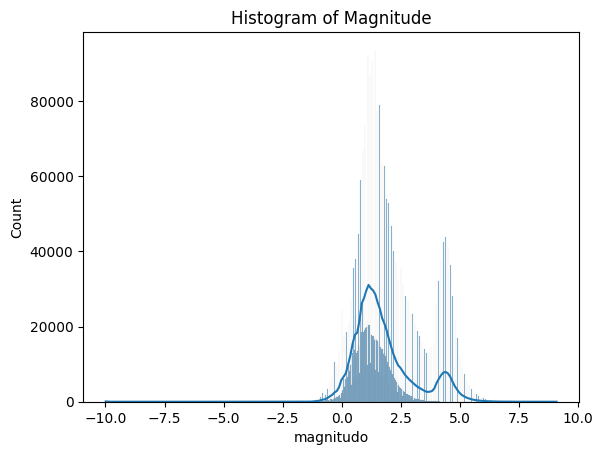

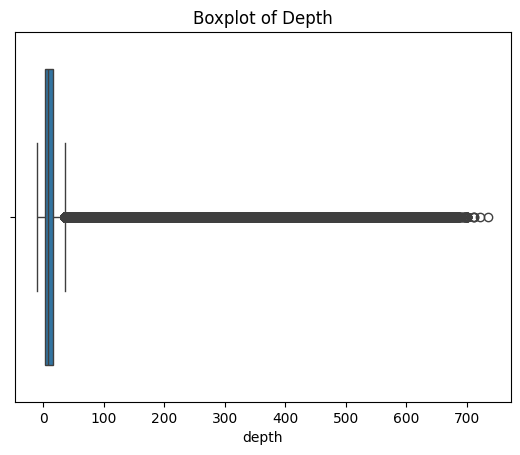

In [27]:
# Histogram of magnitude
sns.histplot(data=df, x='magnitudo', kde=True)
plt.title('Histogram of Magnitude')
plt.show()

# Boxplot of depth
sns.boxplot(data=df, x='depth')
plt.title('Boxplot of Depth')
plt.show()

Histogramme de la Magnitude :

La majorité des séismes ont une magnitude entre 0 et 2, avec un pic principal autour de ces valeurs.
Les magnitudes élevées (>5) sont rares, comme le montre la queue décroissante de la distribution.
Ces observations confirment que la plupart des séismes enregistrés sont de faible intensité.

Boxplot de la Profondeur :

La répartition des profondeurs montre une forte concentration de séismes près de la surface.
Les points au-delà des moustaches indiquent des séismes à grande profondeur, jusqu’à plus de 600 km.
La présence d’outliers peut refléter des événements sismiques rares nécessitant une analyse détaillée.

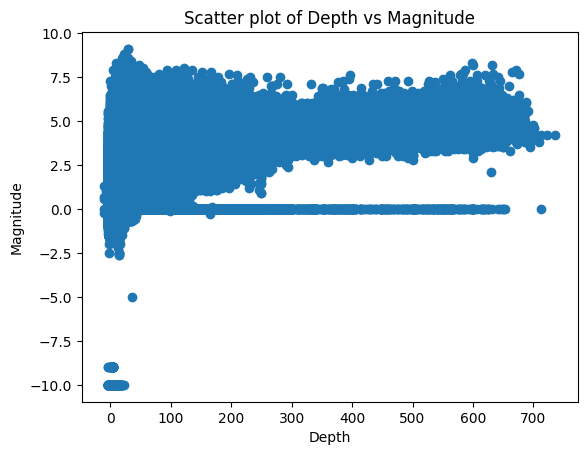

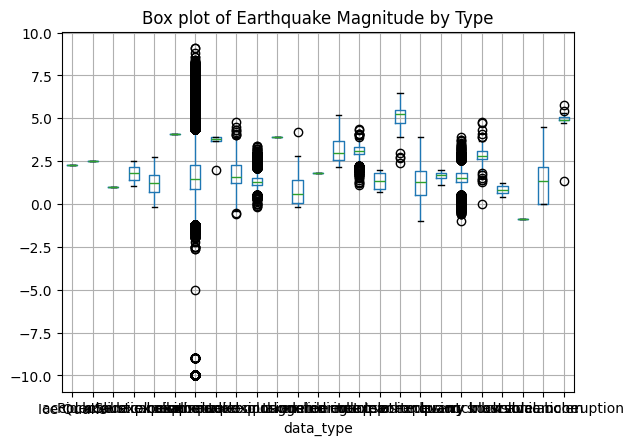

In [28]:
# Scatter plot of depth vs magnitude
plt.scatter(df['depth'], df['magnitudo'])
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Scatter plot of Depth vs Magnitude')
plt.show()

# Box plot of earthquake magnitude by type
df.boxplot(column='magnitudo', by='data_type')
plt.title('Box plot of Earthquake Magnitude by Type')
plt.suptitle('')
plt.show()

Scatter plot of Depth vs Magnitude : Ce graphique montre la relation entre la profondeur et la magnitude des tremblements de terre. La plupart des points semblent concentrés autour de faibles magnitudes, quelle que soit la profondeur, mais il y a des valeurs aberrantes notables.

Box plot of Earthquake Magnitude by Type : Ce diagramme en boîte compare les magnitudes des tremblements de terre selon leur type. Chaque boîte montre la médiane, l'étendue interquartile et les valeurs aberrantes pour chaque catégorie. Les types de tremblements de terre présentent une variabilité significative en termes de magnitude.


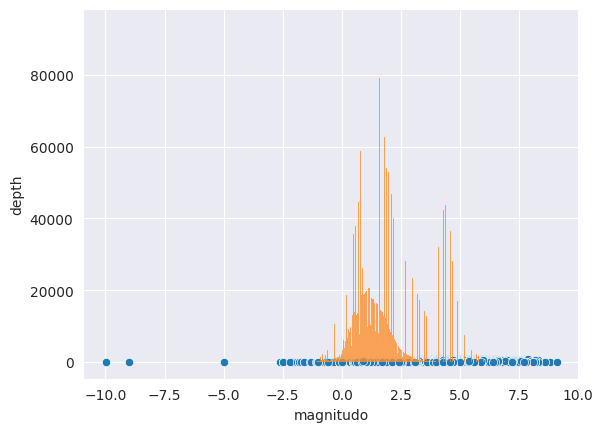

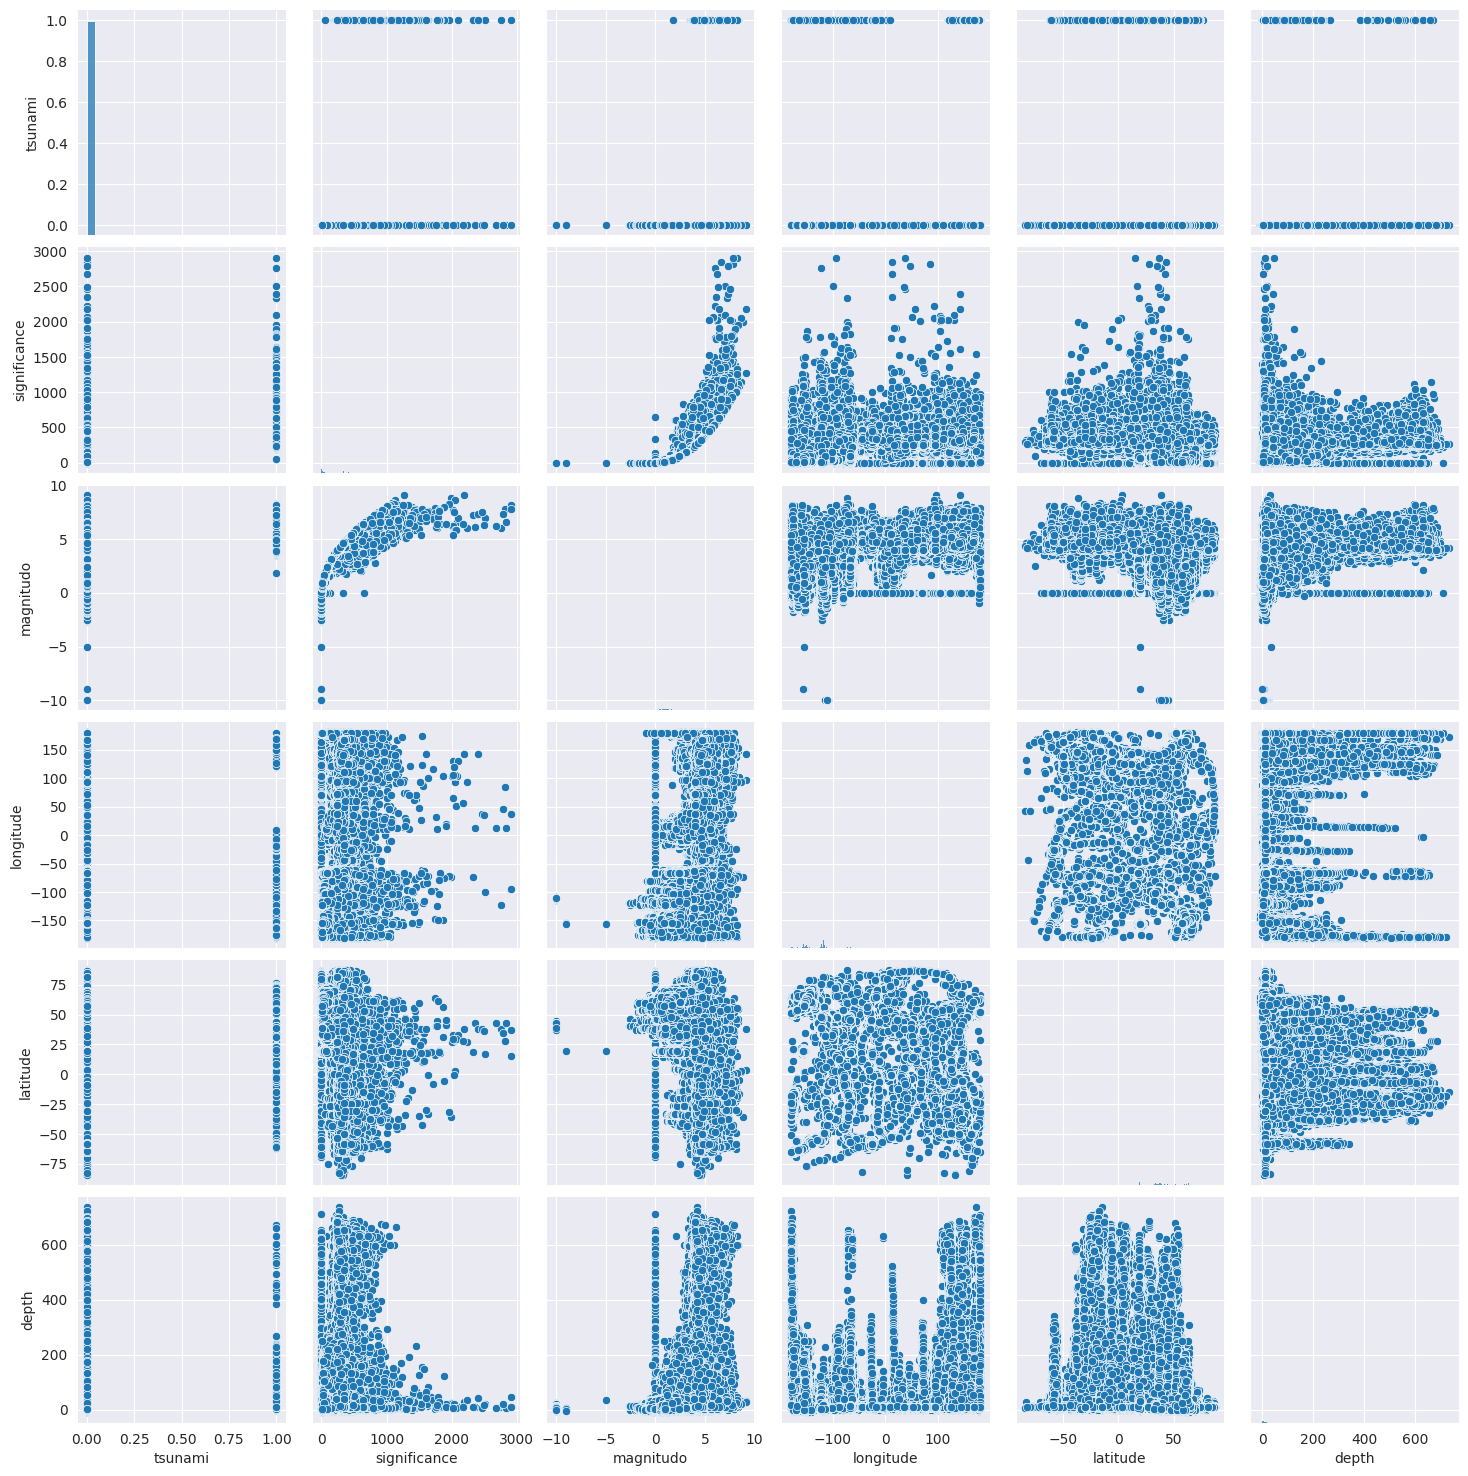

In [29]:
# Set style for all visualizations
sns.set_style("darkgrid")

# Scatter plot to show relationship between magnitude and depth
sns.scatterplot(data=df, x="magnitudo", y="depth")

# Bar plot to show distribution of magnitudes
sns.histplot(data=df, x="magnitudo")


# Pairplot to show scatterplots of all possible variable combinations
sns.pairplot(df)

# Show all visualizations
plt.show()

Le graphique montre une densité élevée de magnitudes entre 0 et 5, avec une distribution centrale marquée autour de 2,5.

Des points épars et des valeurs aberrantes sont visibles pour des magnitudes négatives ou extrêmes.

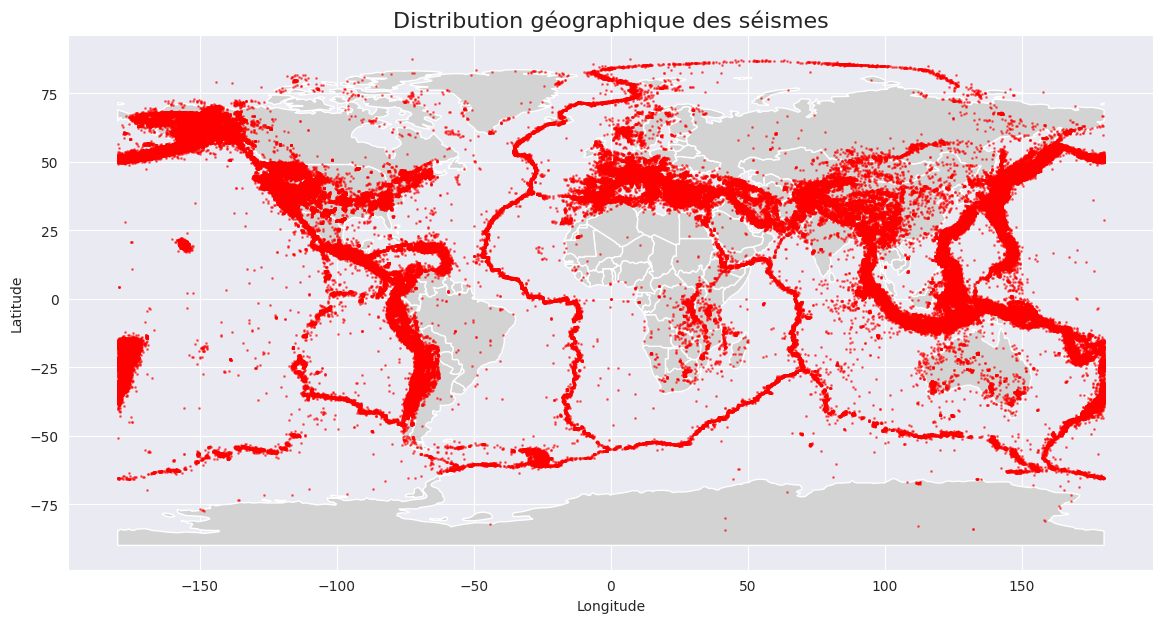

In [33]:
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')
# Créer un GeoDataFrame avec les coordonnées de longitude et latitude

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Tracer la carte
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey')  # Fond de carte
gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5)  # Séismes

# Ajouter un titre et labels
plt.title('Distribution géographique des séismes', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Afficher la carte
plt.show()

Cette carte montre la distribution géographique des séismes dans le monde.


Concentration autour des zones tectoniques :
Les séismes sont principalement concentrés le long des limites des plaques tectoniques, comme la Ceinture de feu du Pacifique, la dorsale médio-atlantique, et les zones de collision en Asie.

Faible densité dans les zones continentales :
Les régions à l'intérieur des continents présentent généralement moins de séismes, sauf dans les zones sismiques actives .

#2. Modélisation Stochastique

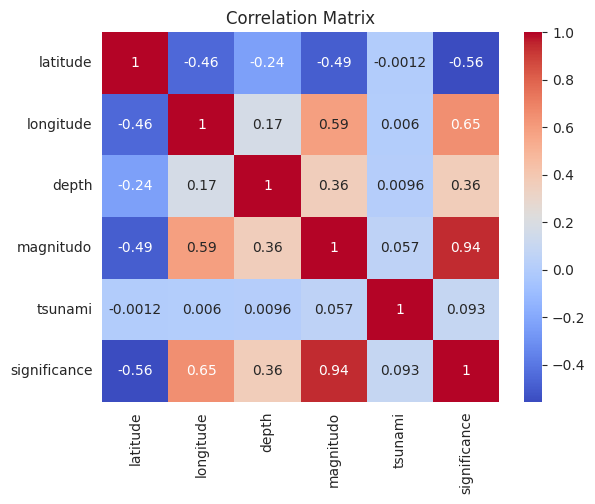

In [34]:
# Select the numerical columns for correlation analysis
numeric_cols = ['latitude', 'longitude', 'depth', 'magnitudo', 'tsunami', 'significance']

# Create correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


La matrice montre une forte corrélation entre la magnitude et la signification des séismes, ainsi qu'entre la longitude et la signification.

### Hypothèse :

- Hypothèse nulle (H0) : La magnitude des séismes n'est pas significativement influencée par la localisation, la profondeur et le moment de l'occurrence.
- Hypothèse alternative (H1) : La magnitude des séismes est significativement influencée par la localisation, la profondeur et le moment de l'occurrence.

In [35]:
# Extraction de la région à partir de la colonne 'place'
df['region'] = df['place'].str.extract(',\s(.*$)')

# Calcul de la moyenne de la magnitude par région
mean_mag_by_region = df.groupby('region')['magnitudo'].mean()

# Création de groupes basés sur la moyenne globale de la magnitude
global_mean_mag = df['magnitudo'].mean()
group1 = df[df['magnitudo'] < global_mean_mag]
group2 = df[df['magnitudo'] >= global_mean_mag]

# Test t de Student entre les deux groupes
t_stat, p_val = ttest_ind(group1['magnitudo'], group2['magnitudo'], equal_var=False)

print("T-test statistic:", t_stat)
print("P-value:", p_val)

# Analyse des résultats
if p_val < 0.05:
    print("La différence dans les magnitudes entre les régions est statistiquement significative.")
    print("Nous rejetons l'hypothèse nulle.")
else:
    print("Aucune différence significative n'a été détectée dans les magnitudes entre les régions.")
    print("Nous ne pouvons pas rejeter l'hypothèse nulle.")


T-test statistic: -2036.3393484211103
P-value: 0.0
La différence dans les magnitudes entre les régions est statistiquement significative.
Nous rejetons l'hypothèse nulle.


In [36]:
# Fonction pour réaliser le test t
def test_t(attribute):
    # Diviser les données en deux groupes en fonction de l'attribut
    mean_value = df[attribute].mean()
    group1 = df[df[attribute] < mean_value]
    group2 = df[df[attribute] >= mean_value]

    # Test t de Student entre les deux groupes
    t_stat, p_val = ttest_ind(group1['magnitudo'], group2['magnitudo'], equal_var=False)

    # Afficher les résultats
    print(f"T-test pour {attribute}:")
    print(f"Statistique T: {t_stat}")
    print(f"P-value: {p_val}")

    if p_val < 0.05:
        print(f"L'attribut {attribute} a un effet significatif sur la magnitude.")
    else:
        print(f"Aucun effet significatif de l'attribut {attribute} sur la magnitude.")
    print("\n")



In [37]:
# Appliquer le test t sur chaque attribut
attributes = ['significance', 'depth', 'latitude', 'longitude', 'time']
for attr in attributes:
    test_t(attr)

T-test pour significance:
Statistique T: -2243.5357249850263
P-value: 0.0
L'attribut significance a un effet significatif sur la magnitude.


T-test pour depth:
Statistique T: -795.0238852303893
P-value: 0.0
L'attribut depth a un effet significatif sur la magnitude.


T-test pour latitude:
Statistique T: 503.8030750325185
P-value: 0.0
L'attribut latitude a un effet significatif sur la magnitude.


T-test pour longitude:
Statistique T: -1403.0922481449807
P-value: 0.0
L'attribut longitude a un effet significatif sur la magnitude.


T-test pour time:
Statistique T: 238.96291985242624
P-value: 0.0
L'attribut time a un effet significatif sur la magnitude.




In [38]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Créez un modèle ANOVA
model = ols('magnitudo ~ C(data_type)', data=df).fit()

# Résultats ANOVA
anova_results = anova_lm(model)
print(anova_results)


                     df        sum_sq     mean_sq          F  PR(>F)
C(data_type)       24.0  1.056253e+04  440.105230  264.52296     0.0
Residual      3445726.0  5.732894e+06    1.663769        NaN     NaN


In [ ]:
model = ols('depth ~ C(place)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)


In [39]:
df_model = df[['magnitudo', 'significance', 'depth', 'latitude', 'longitude']].dropna()

# Définir la variable dépendante (Y) et les variables explicatives (X)
X = df_model[['significance', 'depth', 'latitude', 'longitude']]
y = df_model['magnitudo']


In [40]:
# Ajout d'une constante pour l'interception
X = sm.add_constant(X)

In [41]:
# Diviser les données en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Créer et ajuster le modèle
model = sm.OLS(y_train, X_train).fit()

In [43]:
# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test)

In [44]:
# Résumé du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              magnitudo   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                 5.269e+06
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:51:09   Log-Likelihood:            -1.6414e+06
No. Observations:             2756600   AIC:                         3.283e+06
Df Residuals:                 2756595   BIC:                         3.283e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7117      0.001    755.118   

In [45]:
# Ajuster le modèle avec scikit-learn
linreg = LinearRegression()
linreg.fit(X_train.drop(columns='const'), y_train)  # Enlever la constante pour sklearn

# Prédictions sur l'ensemble de test
y_pred_lr = linreg.predict(X_test.drop(columns='const'))

# Calculer les erreurs et le coefficient de détermination
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Erreur Absolue Moyenne (MAE): {mae_lr}")
print(f"Racine de l'Erreur Quadratique Moyenne (RMSE): {rmse_lr}")
print(f"Coefficient de Détermination (R2): {r2_lr}")


Erreur Absolue Moyenne (MAE): 0.29888023272703707
Racine de l'Erreur Quadratique Moyenne (RMSE): 0.4391781093527097
Coefficient de Détermination (R2): 0.8846989991341843


In [46]:
# Créer un DataFrame avec les valeurs réelles et prédites
df_comparison = pd.DataFrame({
    'Valeur réelle': y_test,
    'Valeur prédite': y_pred,
    'Valeur prédite LR': y_pred_lr
})

# Afficher les 10 premières lignes pour vérificatio
df_comparison.head(10)

,Valeur réelle,Valeur prédite,Valeur prédite LR
1699008,1.48,1.267008,1.267008
24039,1.47,1.267998,1.267998
2681076,2.40,2.051466,2.051466
249359,1.69,1.395047,1.395047
2938561,1.30,1.251060,1.251060
2670354,0.36,0.889109,0.889109
2906187,1.26,1.159551,1.159551
521754,1.80,1.578962,1.578962
1616211,0.30,0.861578,0.861578
2111644,0.66,0.951246,0.951246


In [47]:
# Calcul des erreurs
mae = mean_absolute_error(y_test, y_pred)  # Erreur absolue moyenne
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Racine de l'erreur quadratique moyenne

print(f"\nErreur absolue moyenne (MAE): {mae}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse}")


Erreur absolue moyenne (MAE): 0.2988802327270373
Racine de l'erreur quadratique moyenne (RMSE): 0.4391781093527098


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


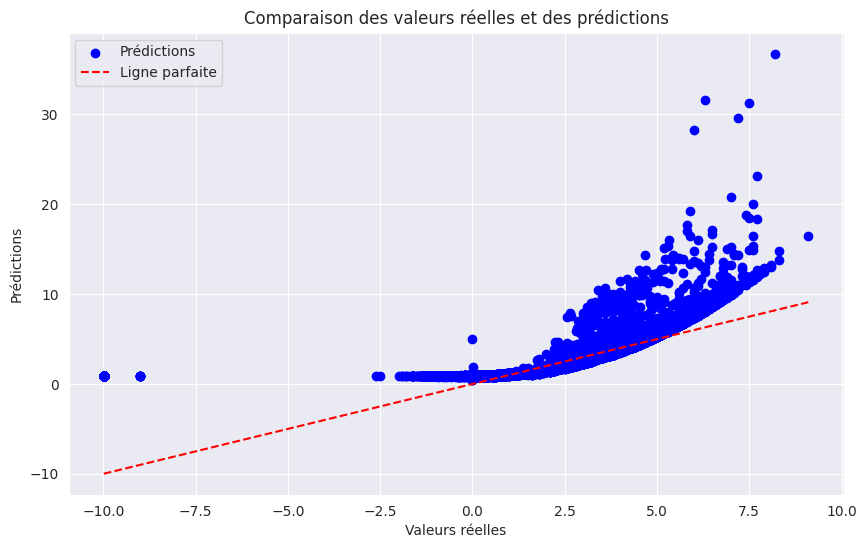

In [48]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Comparaison entre les résultats réels et les prédictions
plt.scatter(y_test, y_pred, color='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne parfaite')

plt.title('Comparaison des valeurs réelles et des prédictions')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.legend()
plt.grid(True)
plt.show()

Précision générale : Le modèle capture globalement la tendance des données, comme le montre la proximité de nombreux points avec la ligne parfaite. Cependant, la dispersion autour de cette ligne indique la présence d'erreurs dans certaines prédictions.

Erreurs extrêmes : Quelques prédictions s'écartent considérablement des valeurs réelles, ce qui peut refléter des valeurs aberrantes ou des cas où le modèle n'a pas correctement appris les relations dans les données.

Axes d'amélioration : Une analyse approfondie des erreurs pourrait identifier des pistes pour améliorer les performances du modèle. Cela pourrait inclure l'ajustement des hyperparamètres, l'exploration de nouvelles fonctionnalités ou la transformation des données.

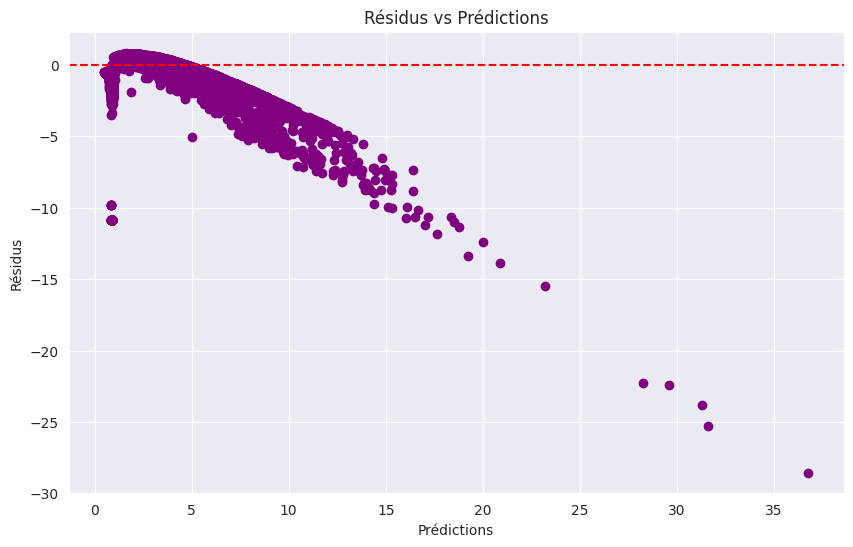

In [49]:
# Visualisation des erreurs de prédiction (résidus)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Résidus vs Prédictions')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.grid(True)
plt.show()

Analyse des Résidus :

Structure des erreurs : Le graphique présente la répartition des résidus par rapport aux prédictions. La ligne rouge représente une erreur nulle. Une distribution aléatoire des points autour de cette ligne suggère que le modèle capte bien la tendance générale des données.

Tendances visibles : On observe une certaine structure asymétrique dans la distribution des résidus, ce qui pourrait indiquer des biais dans les prédictions du modèle. Par exemple, les résidus négatifs sont plus fréquents pour les faibles valeurs prédites, ce qui pourrait être le signe d'une sous-estimation dans ces cas.

Axes d'amélioration : Une analyse complémentaire des résidus, accompagnée de tests statistiques ou d'autres visualisations, permettrait de valider ces hypothèses de biais. Pour améliorer la performance du modèle, des ajustements d'hyperparamètres ou l'ajout de nouvelles fonctionnalités pourraient être envisagés.

In [50]:
# Calcul des VIF (Variance Inflation Factor) pour détecter la multi-colinéarité
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
       Variable        VIF
0         const  12.715735
1  significance   2.228982
2         depth   1.165783
3      latitude   1.488557
4     longitude   1.794442


In [51]:
# Test de l'homoscédasticité
_, pval, _, f_pval = het_breuschpagan(model.resid, model.model.exog)
print(f"\nTest de Breusch-Pagan pour l'homoscédasticité:")
print(f"p-value: {pval}, f_p-value: {f_pval}")


Test de Breusch-Pagan pour l'homoscédasticité:
p-value: 0.0, f_p-value: 0.0


In [52]:
# Test de normalité des résidus (Shapiro-Wilk)
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print("\nTest de normalité des résidus (Shapiro-Wilk):")
print(f"Statistique: {stat}, p-value: {p}")


Test de normalité des résidus (Shapiro-Wilk):
Statistique: 0.7594456211845753, p-value: 3.978333122658357e-194


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2756600.
  res = hypotest_fun_out(*samples, **kwds)


In [53]:
# Test d'indépendance des résidus (Durbin-Watson)
dw_stat = durbin_watson(model.resid)
print("\nTest de Durbin-Watson pour l'indépendance des résidus:")
print(f"Statistique: {dw_stat}")


Test de Durbin-Watson pour l'indépendance des résidus:
Statistique: 1.9995968271002178


In [54]:
# Points levier et distance de Cook
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

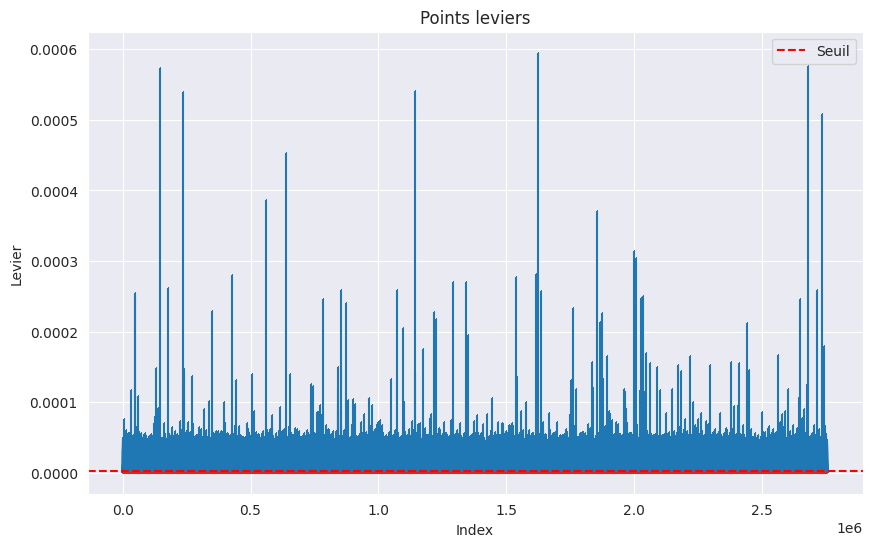

In [55]:
# Visualisation des leviers
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(leverage)), leverage, markerfmt=",")
plt.axhline(y=2 * X.shape[1] / len(y), color="red", linestyle="--", label="Seuil")
plt.title("Points leviers")
plt.xlabel("Index")
plt.ylabel("Levier")
plt.legend()
plt.show()


Cette visualisation montre les points leviers calculés à partir des données. Les points leviers sont utilisés pour identifier les observations ayant une forte influence sur le modèle de régression. Les valeurs au-dessus de la ligne rouge (seuil défini par Seuil= 2*p/n , où p est le nombre de prédicteurs et n est le nombre total d'observations) indiquent des points potentiellement influents. Ces observations doivent être examinées plus attentivement, car elles peuvent indiquer des anomalies ou des cas ayant un effet disproportionné sur le modèle.

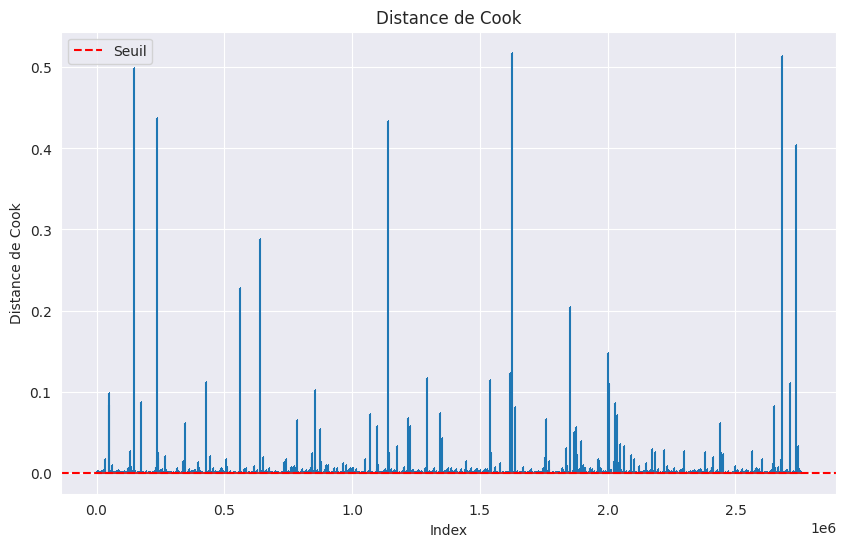

In [56]:
# Visualisation de la distance de Cook
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(y=4 / (len(y) - X.shape[1]), color="red", linestyle="--", label="Seuil")
plt.title("Distance de Cook")
plt.xlabel("Index")
plt.ylabel("Distance de Cook")
plt.legend()
plt.show()


Cette visualisation illustre la distance de Cook pour chaque observation, utilisée pour évaluer l'influence individuelle des points de données sur le modèle de régression. Les valeurs dépassant le seuil rouge (Seuil= 4/( n-p') , où n est le nombre d'observations et p le nombre de prédicteurs) indiquent des points influents potentiels. Ces observations doivent être étudiées attentivement, car elles peuvent fortement affecter les coefficients ou les performances du modèle.

In [57]:
# Calculer les résidus et les prédictions
residuals = model.resid
fitted_values = model.fittedvalues

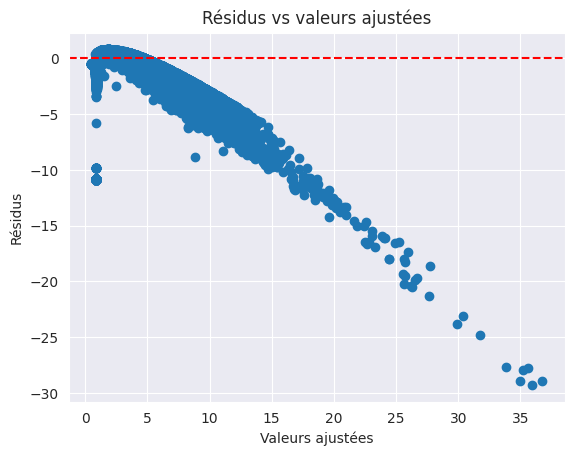

In [58]:
# Diagramme des résidus
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.title('Résidus vs valeurs ajustées')
plt.show()

Ce graphique illustre la relation entre les résidus et les valeurs ajustées pour un modèle donné. Idéalement, les résidus devraient être distribués de manière aléatoire autour de la ligne zéro (ligne rouge), sans présenter de motif particulier. Cela indiquerait que le modèle capture correctement les tendances des données, respectant ainsi les hypothèses d'homoscédasticité et de linéarité.

Cependant, dans ce graphique spécifique, on observe une structure claire, avec une forme de courbe décroissante. Cela suggère un problème potentiel de non-linéarité ou une hétéroscédasticité, où la variance des résidus varie en fonction des valeurs ajustées. Ce type de motif peut indiquer que le modèle ne s'ajuste pas parfaitement aux données, nécessitant potentiellement une révision du modèle ou une transformation des données pour mieux capturer la relation sous-jacente.

In [59]:
# Calculer la matrice de variance-covariance des coefficients
cov_matrix = model.cov_params()

In [60]:
# Visualisation de l'ellipse de confiance (par exemple pour les coefficients 1 et 2)
# On prend les indices des coefficients (1 et 2) pour l'ellipse de confiance
coeffs = model.params[1:3]  # Les coefficients à considérer (ex : coefficient 1 et 2)
cov_matrix_sub = cov_matrix.iloc[1:3, 1:3]  # Sous-matrice de variance-covariance pour ces coefficients

In [61]:
# Calculer les valeurs propres et les vecteurs propres de la matrice de covariance
eigvals, eigvecs = np.linalg.eig(cov_matrix_sub)

In [62]:
# Rayon de l'ellipse basé sur la racine carrée des valeurs propres
theta = np.linspace(0, 2 * np.pi, 100)
ellipse_x = np.sqrt(eigvals[0]) * np.cos(theta)
ellipse_y = np.sqrt(eigvals[1]) * np.sin(theta)

In [63]:
# Rotation de l'ellipse en fonction des vecteurs propres
ellipse_x_rot = eigvecs[0, 0] * ellipse_x + eigvecs[0, 1] * ellipse_y
ellipse_y_rot = eigvecs[1, 0] * ellipse_x + eigvecs[1, 1] * ellipse_y

<ipython-input-64-5e12070cd5c9>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(ellipse_x_rot + coeffs[0], ellipse_y_rot + coeffs[1], label='Ellipse de confiance à 95%')
<ipython-input-64-5e12070cd5c9>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(coeffs[0], coeffs[1], color='red', label='Estimations des coefficients')


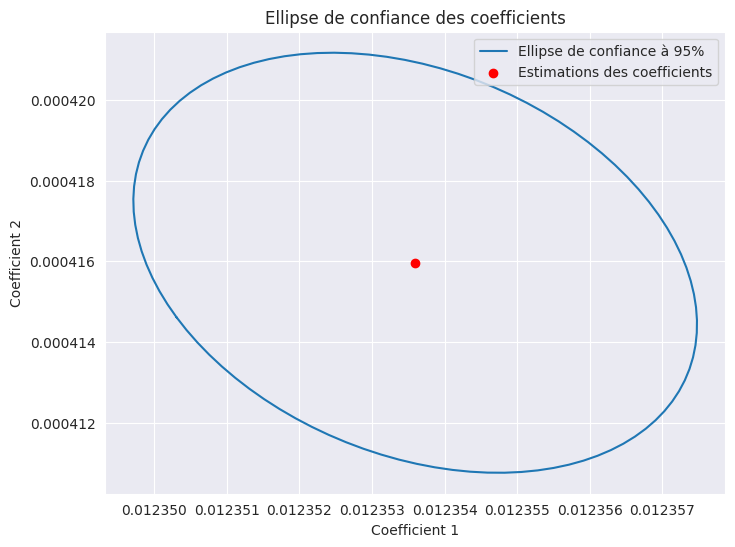

In [64]:
# Tracer l'ellipse
plt.figure(figsize=(8, 6))
plt.plot(ellipse_x_rot + coeffs[0], ellipse_y_rot + coeffs[1], label='Ellipse de confiance à 95%')
plt.scatter(coeffs[0], coeffs[1], color='red', label='Estimations des coefficients')

plt.title('Ellipse de confiance des coefficients')
plt.xlabel('Coefficient 1')
plt.ylabel('Coefficient 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

Les estimations des coefficients se situent au centre de l'ellipse,ce qui montre que ces valeurs sont plausibles à un niveau de confiance de 95%.

L'ellipse est légèrement étirée sur l'axe horizontal, ce qui pourrait indiquer une incertitude légèrement plus élevée sur le coefficient 1 par rapport au coefficient 2.

La taille réduite de l'ellipse suggère que l'incertitude autour des coefficients est globalement faible, ce qui est un bon indicateur de la stabilité du modèle.



In [65]:
# Exemple de données pour tester la prédiction
test_data = {
    'const':1,
    'significance': [20],  # Liste des valeurs de 'significance'
    'depth': [1.225],  # Liste des valeurs de 'depth'
    'latitude': [34.0410],  # Liste des valeurs de 'latitude'
    'longitude': [-116.3070]  # Liste des valeurs de 'longitude'
}

test_df = pd.DataFrame(test_data)

X_test = test_df

print(X_test)


   const  significance  depth  latitude  longitude
0      1            20  1.225    34.041   -116.307


In [66]:
# Faire des prédictions avec les données de test
predictions = model.predict(X_test)

# Afficher les résultats des prédictions
print("Prédictions de magnitudes pour les données de test :")
print(predictions)

Prédictions de magnitudes pour les données de test :
0    1.096688
dtype: float64


In [67]:
# Sauvegarder le modèle avec pickle
with open('seismic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Télécharger le fichier sauvegardé sur votre machine locale
from google.colab import files
files.download('seismic_model.pkl')

# Conclusion


En conclusion, cette étude a permis d'analyser la relation entre la magnitude des séismes et plusieurs facteurs tels que la profondeur, la localisation géographique, la signification et le temps.  L'analyse exploratoire des données a révélé des tendances intéressantes, notamment une concentration des séismes le long des zones tectoniques actives. La modélisation, basée sur une régression linéaire, a permis de construire un modèle prédictif de la magnitude. L'évaluation du modèle, via des indicateurs de performance et une analyse des résidus, suggère une performance globale correcte mais avec des axes d'amélioration potentiels pour les prédictions extrêmes et la prise en compte de possibles non-linéarités.  Des analyses supplémentaires, telles que l'exploration de modèles plus complexes ou l'incorporation de variables supplémentaires pourraient renforcer la précision du modèle.  Enfin, le modèle a été sauvegardé pour une utilisation future et des prédictions potentielles.
